# Exploração e Tratamento dos dados




Imports:


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

Loading the data:


In [26]:
trainDf = pd.read_csv('training_data.csv')
testDf = pd.read_csv('test_data.csv')

## Tratamento

Label enconding of categorical features, introducing an inherent order

In [27]:
replace_Incident= {'incidents':{'None':0, 'Low':1, 'Medium':2,'High':3,'Very_High':4}}
replace_AvgRain = {'avg_rain':{'Sem Chuva':0, 'chuva fraca':1, 'chuva moderada':2,'chuva forte':3}}
replace_Lumi    = {'luminosity': {'DARK':0,'LOW_LIGHT':1,'LIGHT':2,}}

trainDf.replace(replace_Incident,inplace=True)
trainDf.replace(replace_AvgRain,inplace=True)
trainDf.replace(replace_Lumi,inplace=True)


testDf.replace(replace_AvgRain,inplace=True)
testDf.replace(replace_Lumi,inplace=True)

In [28]:
# Tratamento da magnitude e delay
replace_Magnitude = {'magnitude_of_delay':{'UNDEFINED':1,'MODERATE':1.5,'MAJOR':2}}
trainDf.replace(replace_Magnitude,inplace=True)
testDf.replace(replace_Magnitude,inplace=True)


minMax = MinMaxScaler()

#Utiliza a magnitude of delay para acentuar o delay
trainDf["delay_in_seconds"] = trainDf["delay_in_seconds"] * trainDf['magnitude_of_delay'] 
testDf["delay_in_seconds"] = testDf["delay_in_seconds"]   * testDf['magnitude_of_delay']


#trainDf["delay_in_seconds"].mask((trainDf["delay_in_seconds"]>=7000),7000,inplace=True)
minMax.fit(trainDf[["delay_in_seconds"]])


trainDf["delay_in_seconds"] = minMax.transform(trainDf[["delay_in_seconds"]])
#testDf["delay_in_seconds"].mask((testDf["delay_in_seconds"]>=7000),7000,inplace=True)
testDf["delay_in_seconds"] = minMax.transform(testDf[["delay_in_seconds"]])



In [29]:
minmax = MinMaxScaler()

#minMax.fit(trainDf[["avg_atm_pressure"]])

#trainDf["avg_atm_pressure"] = minMax.transform(trainDf[["avg_atm_pressure"]])
#testDf["avg_atm_pressure"] = minMax.transform(testDf[["avg_atm_pressure"]])


minmax = MinMaxScaler()

#minMax.fit(trainDf[["avg_temperature"]])

#trainDf["avg_temperature"] = minMax.transform(trainDf[["avg_temperature"]])
#testDf["avg_temperature"] = minMax.transform(testDf[["avg_temperature"]])


minmax = MinMaxScaler()

minMax.fit(trainDf[["avg_humidity"]])

trainDf["avg_humidity"] = minMax.transform(trainDf[["avg_humidity"]])
testDf["avg_humidity"] = minMax.transform(testDf[["avg_humidity"]])



Date processing:

In [30]:
trainDf['record_date'] = pd.to_datetime(trainDf['record_date'],format='%Y-%m-%d %H:%M',errors='coerce')
testDf['record_date']  = pd.to_datetime(testDf['record_date'],format='%Y-%m-%d %H:%M',errors='coerce')

In [31]:
#Separate month
trainDf['record_date_month'] = trainDf['record_date'].dt.month
testDf['record_date_month'] = testDf['record_date'].dt.month

#Separate day
trainDf['record_date_day'] = trainDf['record_date'].dt.day
testDf['record_date_day'] = testDf['record_date'].dt.day

#Separate hour
trainDf['record_date_hour'] = trainDf['record_date'].dt.hour
testDf['record_date_hour'] = testDf['record_date'].dt.hour

# Separate day of the year
trainDf['dayYear'] = trainDf['record_date'].dt.dayofyear
testDf['dayYear'] = testDf['record_date'].dt.dayofyear


#Introduce variable isWeekend
replace_weekend = {0:0,1:0,2:0,3:0,4:0,5:1,6:1}
trainDf['record_date_isWeekend'] = trainDf['record_date'].dt.dayofweek
trainDf['record_date_isWeekend'].replace(replace_weekend,inplace=True)
testDf['record_date_isWeekend'] = testDf['record_date'].dt.dayofweek
testDf['record_date_isWeekend'].replace(replace_weekend,inplace=True)

In [32]:
#Test for cyclical features

def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data


trainDf = encode(trainDf, 'record_date_day', 31)
trainDf = encode(trainDf, 'record_date_hour', 24)


testDf = encode(testDf, 'record_date_day', 31)
testDf = encode(testDf, 'record_date_hour', 24)



In [33]:
#feriados:


trainDf["record_date_isWeekend"].mask((trainDf['record_date_month']==12) & (trainDf['record_date_day']==1),1,inplace=True)
trainDf["record_date_isWeekend"].mask((trainDf['record_date_month']==12) & (trainDf['record_date_day']==1) , 1, inplace=True)
trainDf["record_date_isWeekend"].mask((trainDf['record_date_month']==12) & (trainDf['record_date_day']==8) , 1, inplace=True)
trainDf["record_date_isWeekend"].mask((trainDf['record_date_month']==12) & (trainDf['record_date_day']==25) , 1, inplace=True)
trainDf["record_date_isWeekend"].mask((trainDf['record_date_month']==12) & (trainDf['record_date_day']==31) , 1, inplace=True)
trainDf["record_date_isWeekend"].mask((trainDf['record_date_month']==12) & (trainDf['record_date_day']==24) , 1, inplace=True)
trainDf["record_date_isWeekend"].mask((trainDf['record_date_month']==1)  & (trainDf['record_date_day']==1) , 1, inplace=True)
trainDf["record_date_isWeekend"].mask((trainDf['record_date_month']==10) & (trainDf['record_date_day']==5) , 1, inplace=True)
trainDf["record_date_isWeekend"].mask((trainDf['record_date_month']==5)  & (trainDf['record_date_day']==25) , 1, inplace=True)
trainDf["record_date_isWeekend"].mask((trainDf['record_date_month']==6)  & (trainDf['record_date_day']==10) , 1, inplace=True)
trainDf["record_date_isWeekend"].mask((trainDf['record_date_month']==8)  & (trainDf['record_date_day']==15) , 1, inplace=True)


testDf["record_date_isWeekend"].mask((testDf['record_date_month']==12) & (testDf['record_date_day']==1),1,inplace=True)
testDf["record_date_isWeekend"].mask((testDf['record_date_month']==12) & (testDf['record_date_day']==1) , 1, inplace=True)
testDf["record_date_isWeekend"].mask((testDf['record_date_month']==12) & (testDf['record_date_day']==8) , 1, inplace=True)
testDf["record_date_isWeekend"].mask((testDf['record_date_month']==12) & (testDf['record_date_day']==25) , 1, inplace=True)
testDf["record_date_isWeekend"].mask((testDf['record_date_month']==12) & (testDf['record_date_day']==31) , 1, inplace=True)
testDf["record_date_isWeekend"].mask((testDf['record_date_month']==12) & (testDf['record_date_day']==24) , 1, inplace=True)
testDf["record_date_isWeekend"].mask((testDf['record_date_month']==1)  & (testDf['record_date_day']==1) , 1, inplace=True)
testDf["record_date_isWeekend"].mask((testDf['record_date_month']==10) & (testDf['record_date_day']==5) , 1, inplace=True)
testDf["record_date_isWeekend"].mask((testDf['record_date_month']==5)  & (testDf['record_date_day']==25) , 1, inplace=True)
testDf["record_date_isWeekend"].mask((testDf['record_date_month']==6)  & (testDf['record_date_day']==10) , 1, inplace=True)
testDf["record_date_isWeekend"].mask((testDf['record_date_month']==8)  & (testDf['record_date_day']==15) , 1, inplace=True)


In [34]:
#jogoGuimaraes
trainDf["jogoGuimaraes"] =0
testDf["jogoGuimaraes"]  =0

trainDf['jogoGuimaraes'].mask((trainDf['record_date_month']==8) & (trainDf['record_date_day']==8),1,inplace=True)
trainDf['jogoGuimaraes'].mask((trainDf['record_date_month']==8) & (trainDf['record_date_day']==22),1,inplace=True)
trainDf['jogoGuimaraes'].mask((trainDf['record_date_month']==9) & (trainDf['record_date_day']==12),1,inplace=True)
trainDf['jogoGuimaraes'].mask((trainDf['record_date_month']==9) & (trainDf['record_date_day']==25),1,inplace=True)
trainDf['jogoGuimaraes'].mask((trainDf['record_date_month']==10) & (trainDf['record_date_day']==22),1,inplace=True)
trainDf['jogoGuimaraes'].mask((trainDf['record_date_month']==10) & (trainDf['record_date_day']==27),1,inplace=True)
trainDf['jogoGuimaraes'].mask((trainDf['record_date_month']==11) & (trainDf['record_date_day']==6),1,inplace=True)
trainDf['jogoGuimaraes'].mask((trainDf['record_date_month']==12) & (trainDf['record_date_day']==11),1,inplace=True)
trainDf['jogoGuimaraes'].mask((trainDf['record_date_month']==12) & (trainDf['record_date_day']==29),1,inplace=True)

testDf['jogoGuimaraes'].mask((testDf['record_date_month']==8) & (testDf['record_date_day']==8),1,inplace=True)
testDf['jogoGuimaraes'].mask((testDf['record_date_month']==8) & (testDf['record_date_day']==22),1,inplace=True)
testDf['jogoGuimaraes'].mask((testDf['record_date_month']==9) & (testDf['record_date_day']==12),1,inplace=True)
testDf['jogoGuimaraes'].mask((testDf['record_date_month']==9) & (testDf['record_date_day']==25),1,inplace=True)
testDf['jogoGuimaraes'].mask((testDf['record_date_month']==10) & (testDf['record_date_day']==22),1,inplace=True)
testDf['jogoGuimaraes'].mask((testDf['record_date_month']==10) & (testDf['record_date_day']==27),1,inplace=True)
testDf['jogoGuimaraes'].mask((testDf['record_date_month']==11) & (testDf['record_date_day']==6),1,inplace=True)
testDf['jogoGuimaraes'].mask((testDf['record_date_month']==12) & (testDf['record_date_day']==11),1,inplace=True)
testDf['jogoGuimaraes'].mask((testDf['record_date_month']==12) & (testDf['record_date_day']==29),1,inplace=True)


In [35]:
#confinamento
trainDf["confinamento"] =0
testDf["confinamento"] =0

trainDf["confinamento"].mask((trainDf['record_date_month'] >=1) & (trainDf['record_date_day'] >15) & (trainDf['record_date_month'] <=3) & (trainDf['record_date_day'] <15),2,inplace=True)
trainDf["confinamento"].mask((trainDf['record_date_month'] >=3) & (trainDf['record_date_day'] >16) & (trainDf['record_date_month'] <=4) & (trainDf['record_date_day'] <19),1,inplace=True)


testDf["confinamento"].mask((testDf['record_date_month'] >=1) & (testDf['record_date_day'] >15) & (testDf['record_date_month'] <=3) & (testDf['record_date_day'] <15),2,inplace=True)
testDf["confinamento"].mask((testDf['record_date_month'] >=3) & (testDf['record_date_day'] >16) & (testDf['record_date_month'] <=4) & (testDf['record_date_day'] <19),1,inplace=True)


Affected_roads processing

In [36]:
data = []


uniqueRoads ={'N101': 23460, 'R206': 327, 'N105': 2155, 'N206': 174, 'N309': 199, 'IC5': 108,  'N310': 17, 'N207-4': 22, 'IC5 - N206': 1, 'EM579': 16}


for roads in trainDf["affected_roads"]:
    roadsList=[0,0,0,0,0,0,0,0,0,0]
    for road in str(roads).split(","):
        if road == "N101":
            roadsList[0]+=1
        elif road == "R206":
            roadsList[1]+=1
        elif road == "N105":
            roadsList[2]+=1
        elif road == "N206":
            roadsList[3]+=1
        elif road == "N309":
            roadsList[4]+=1
        elif road == "IC5":
            roadsList[5]+=1
        elif road == "N310":
            roadsList[6]+=1
        elif road == "EM579":
            roadsList[7]+=1
        elif road == "N207-4":
            roadsList[8]+=1
        if (road in uniqueRoads.keys()):
            roadsList[9]+=1
    data.append(roadsList)



dfRoad = pd.DataFrame(data, columns=["N101","R206","N105","N206","N309","IC5","N310","EM579","N207-4","Affected_Count"])

trainDf = trainDf.join(dfRoad)

In [37]:
data = []
for roads in testDf["affected_roads"]:
    roadsList=[0,0,0,0,0,0,0,0,0,0]
    for road in str(roads).split(","):
        if road == "N101":
            roadsList[0]+=1
        elif road == "R206":
            roadsList[1]+=1
        elif road == "N105":
            roadsList[2]+=1
        elif road == "N206":
            roadsList[3]+=1
        elif road == "N309":
            roadsList[4]+=1
        elif road == "IC5":
            roadsList[5]+=1
        elif road == "N310":
            roadsList[6]+=1
        elif road == "EM579":
            roadsList[7]+=1
        elif road == "N207-4":
            roadsList[8]+=1
        if (road in uniqueRoads.keys()):
            roadsList[9]+=1
    data.append(roadsList)


dfRoad = pd.DataFrame(data, columns=["N101","R206","N105","N206","N309","IC5","N310","EM579","N207-4","Affected_Count"])


testDf = testDf.join(dfRoad)



Correlation Matrix after the treatment

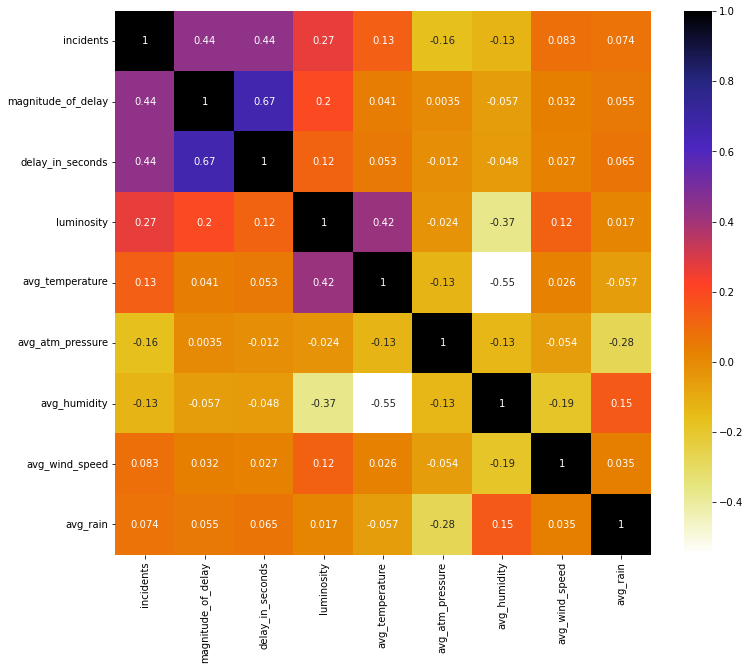

In [38]:
cor = trainDf[["incidents","magnitude_of_delay","delay_in_seconds","luminosity","avg_temperature","avg_atm_pressure","avg_humidity","avg_wind_speed","avg_rain"]].corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

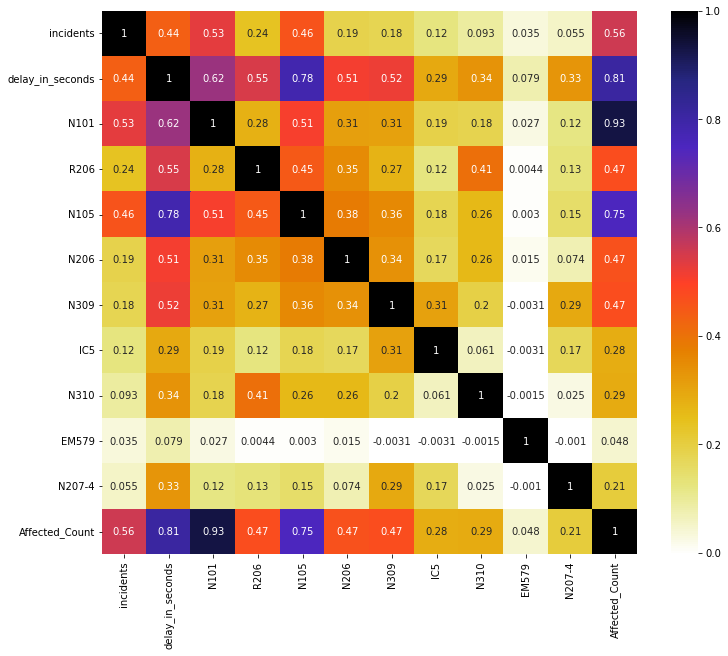

In [39]:
cor = trainDf[["incidents","delay_in_seconds","N101","R206","N105","N206","N309","IC5","N310","EM579","N207-4","Affected_Count"]].corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

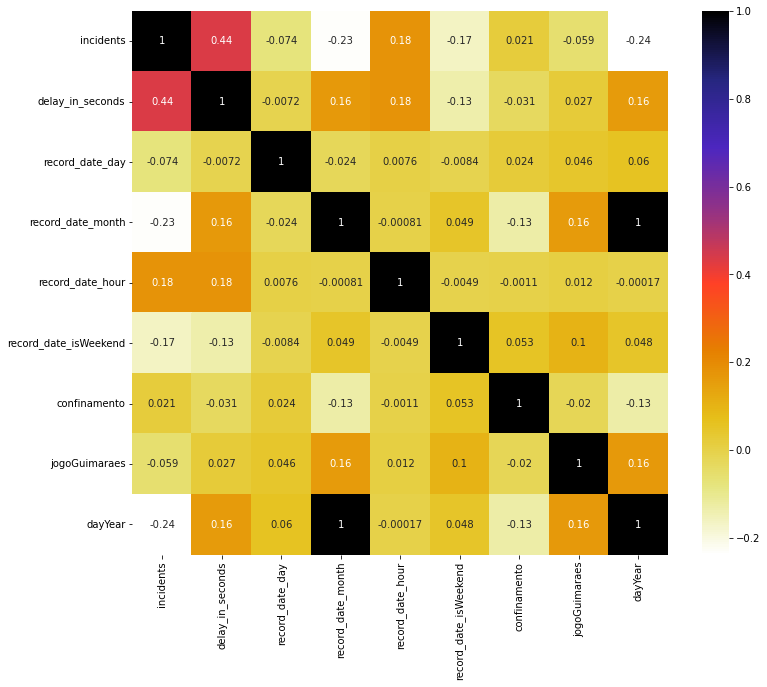

In [40]:
cor = trainDf[["incidents","delay_in_seconds","record_date_day","record_date_month","record_date_hour","record_date_isWeekend","confinamento","jogoGuimaraes","dayYear"]].corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

Write down transformed DS

In [41]:
trainDf.to_csv('training_data_treated.csv',index=False)
testDf.to_csv('test_data_treated.csv',index=False)